In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.metrics import r2_score


In [14]:
params = {'legend.fontsize': 20,
        'figure.figsize': (10, 7.5),
        'axes.labelsize': 20,
        'xtick.labelsize': 15, 
        'ytick.labelsize': 15, }

plt.style.use('dark_background')

plt.rcParams.update(params)

In [15]:
data = pd.read_csv("MinMaxData.csv")
data.head(5)

C:\Users\Oi Celulares e Info\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
max = data['MaxTemp'].values
min = data['MinTemp'].values


Text(0, 0.5, 'min')

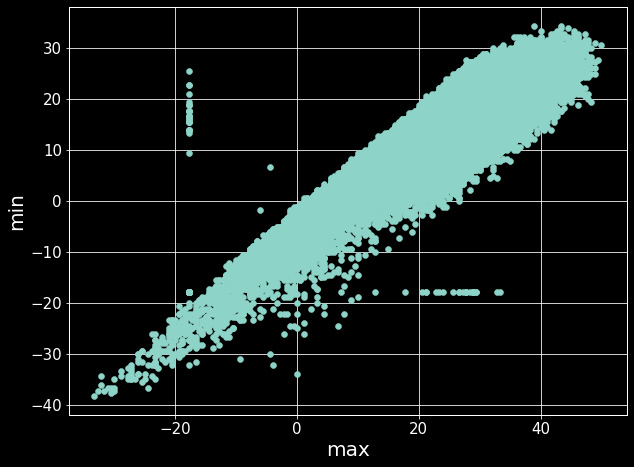

In [17]:
plt.figure()
plt.scatter(max, min)
plt.xlabel('max')
plt.ylabel('min')

In [18]:
t = max
ones = np.ones(len(t))
b = min
A = np.array([ones, t]).T 
AtA = A.T @ A 
Atb = A.T @ b
x_hat = np.linalg.solve(AtA, Atb)


In [19]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1]*t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace


In [20]:
MSE = np.mean((least_square - b)**2)
print('MSE: ', MSE)

MSE:  15.868590425481779


In [21]:
r2 = r2_score(b, least_square)
print('R2 = ', r2)

R2 =  0.7715582862315506


In [22]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1,1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1,1))
least_square_sklearn = regr.predict(t.reshape(-1,1))

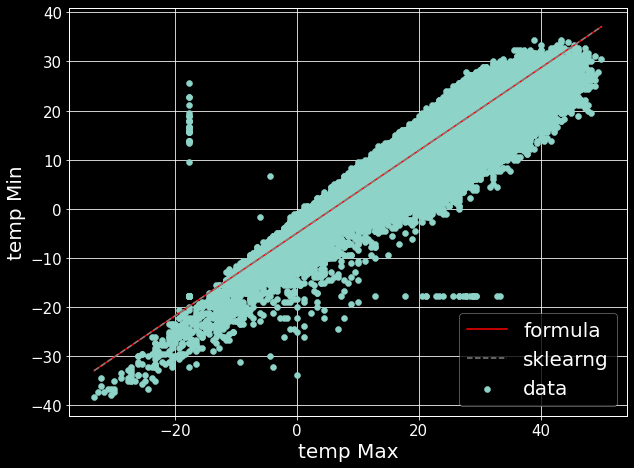

In [24]:
fig, ax = plt.subplots()
plt.scatter(t,b, label='data')
plt.plot(t_linspace, least_square_plot, color='red', label='formula')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--',color='gray', label='sklearng')
plt.xlabel('temp Max')
plt.ylabel('temp Min')
plt.legend()